<a href="https://colab.research.google.com/github/ChadworthMagee/My-snap-code/blob/main/Make_new_image_from_many_small_image_files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving G6-Drop_1-all_pos.png to G6-Drop_1-all_pos.png
Saving G6-Drop_1-last_200.png to G6-Drop_1-last_200.png
Saving G7-Drop_1-all_pos.png to G7-Drop_1-all_pos.png
Saving G7-Drop_1-last_200.png to G7-Drop_1-last_200.png
Saving G8-Drop_1-all_pos.png to G8-Drop_1-all_pos.png
Saving G8-Drop_1-last_200.png to G8-Drop_1-last_200.png
Saving G9-Drop_1-all_pos.png to G9-Drop_1-all_pos.png
Saving G9-Drop_1-last_200.png to G9-Drop_1-last_200.png
Saving H1-Drop_1-all_pos.png to H1-Drop_1-all_pos.png
Saving H1-Drop_1-last_200.png to H1-Drop_1-last_200.png
Saving H2-Drop_1-all_pos.png to H2-Drop_1-all_pos.png
Saving H2-Drop_1-last_200.png to H2-Drop_1-last_200.png
Saving H3-Drop_1-all_pos.png to H3-Drop_1-all_pos.png
Saving H3-Drop_1-last_200.png to H3-Drop_1-last_200.png
Saving H4-Drop_1-all_pos.png to H4-Drop_1-all_pos.png
Saving H4-Drop_1-last_200.png to H4-Drop_1-last_200.png
Saving H5-Drop_1-all_pos.png to H5-Drop_1-all_pos.png
Saving H5-Drop_1-last_200.png to H5-Drop_1-last_200.png
Saving H6-

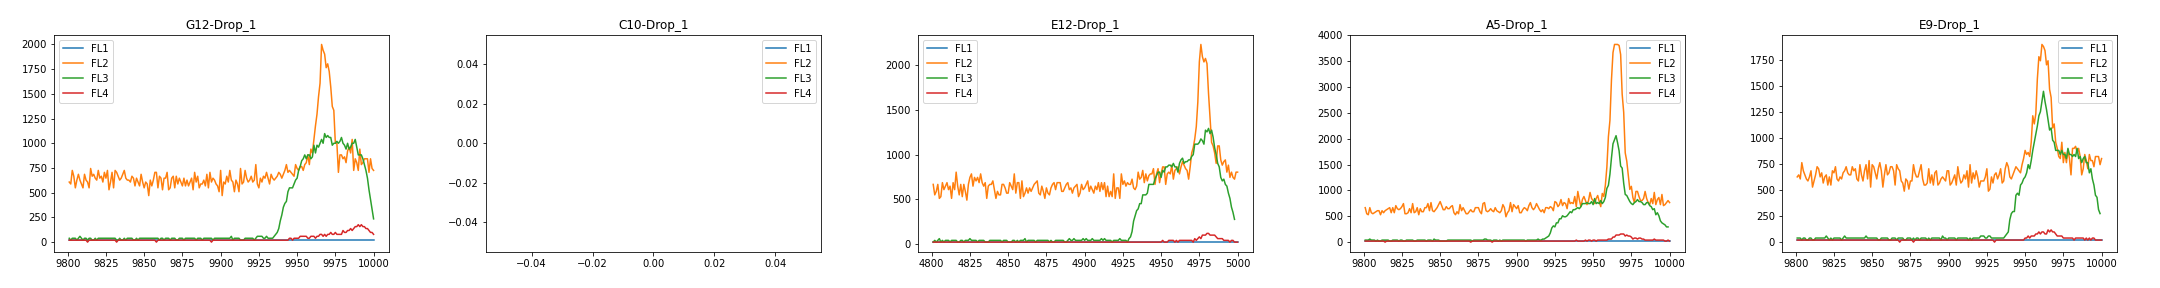

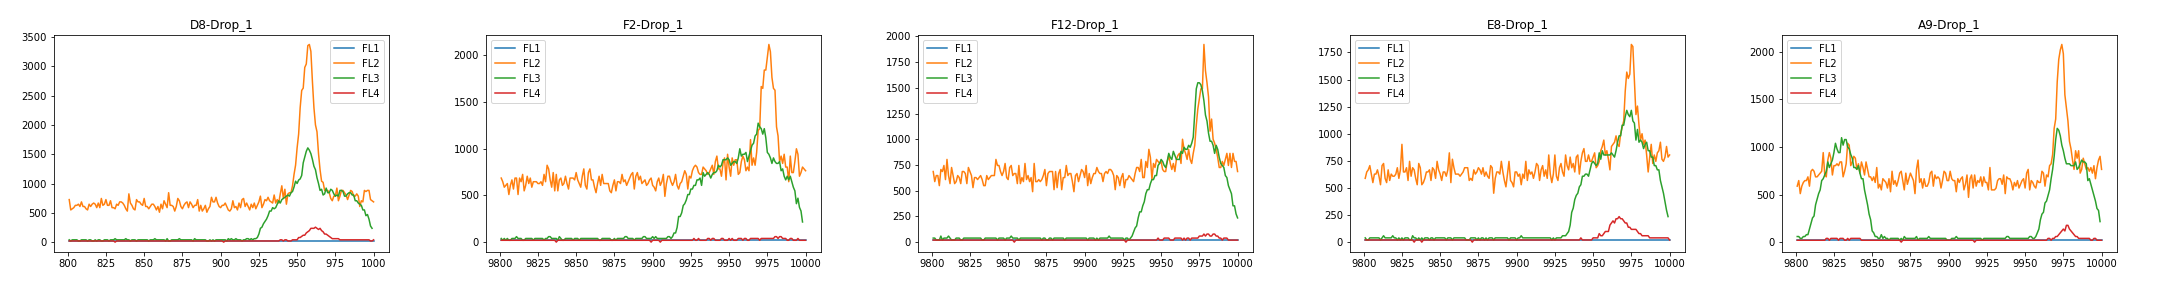

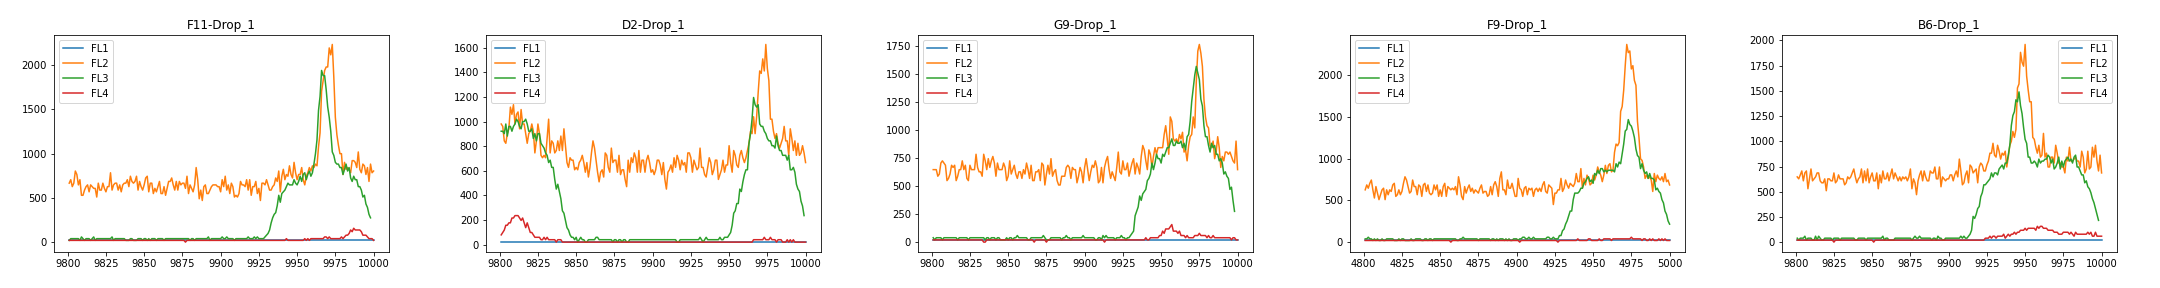

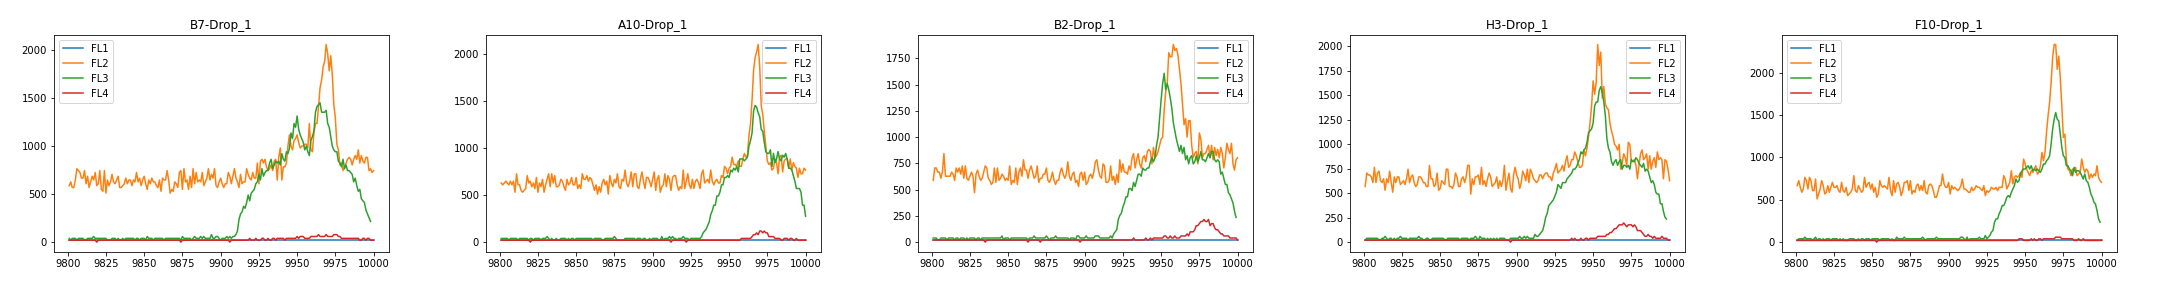

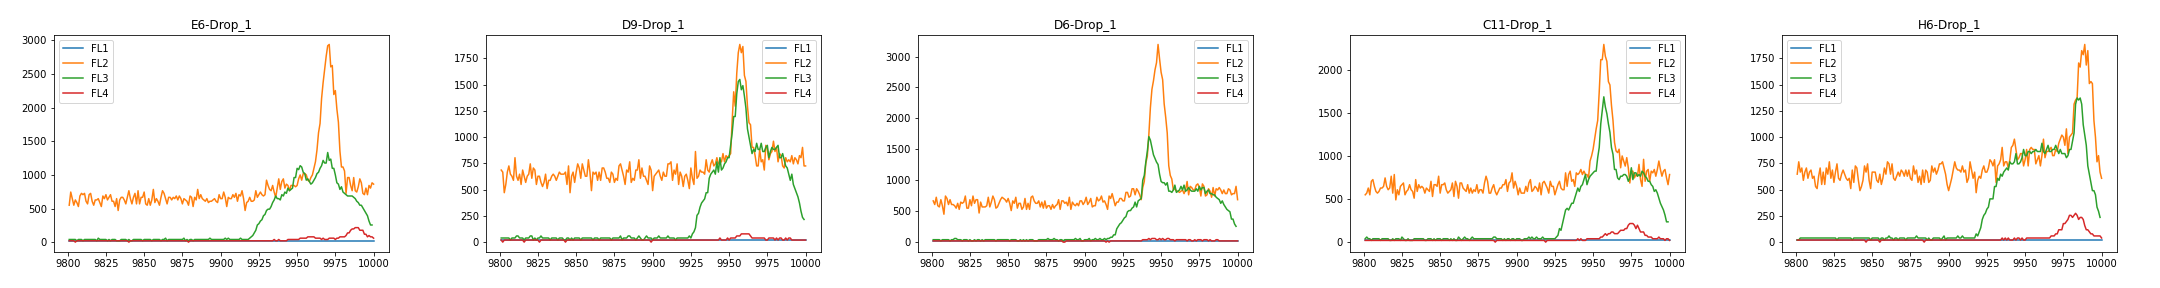

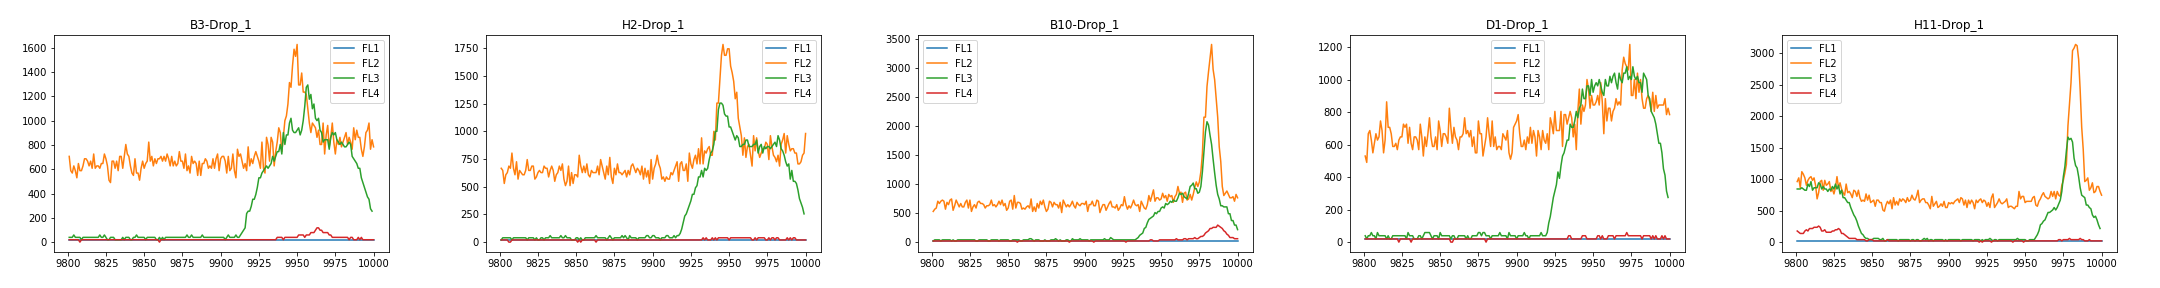

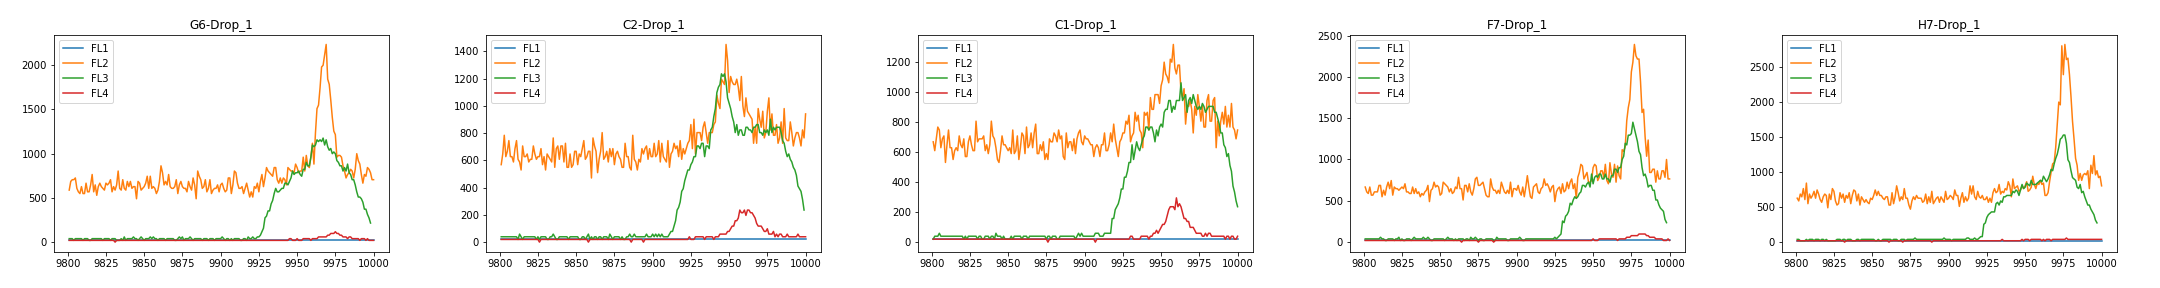

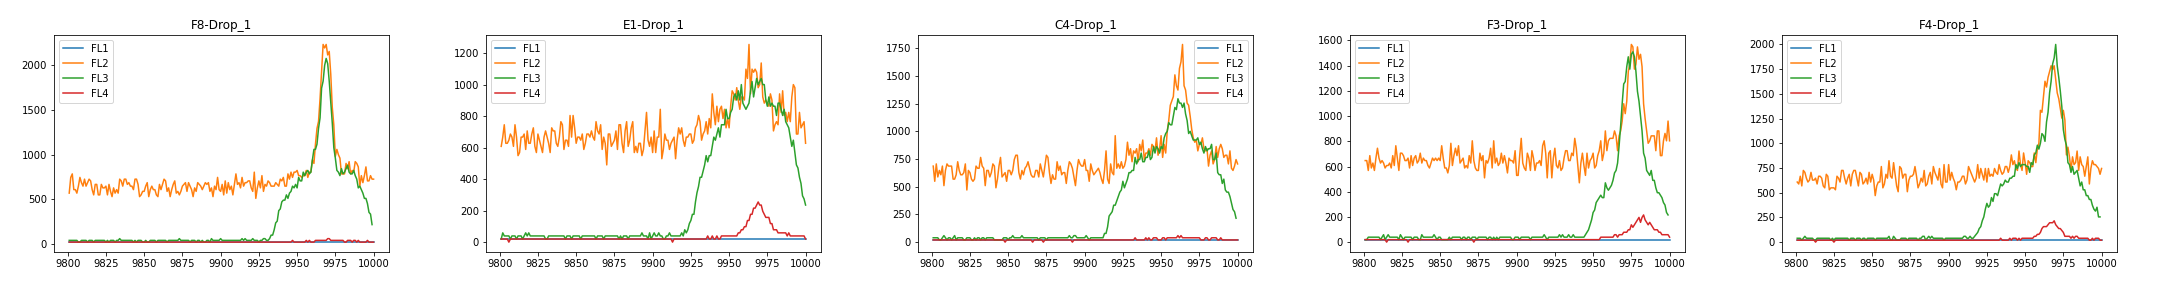

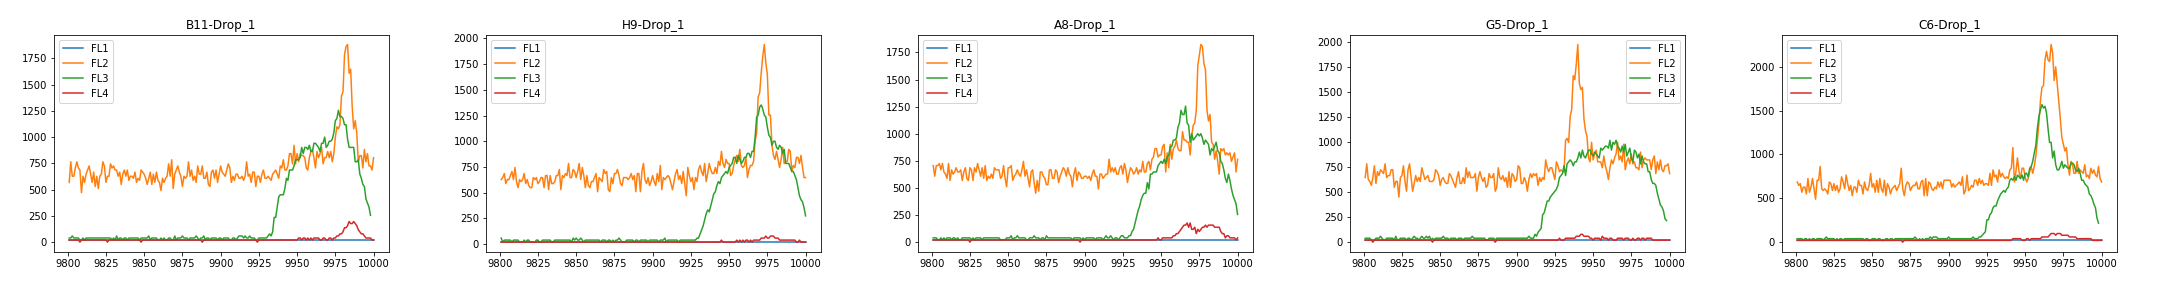

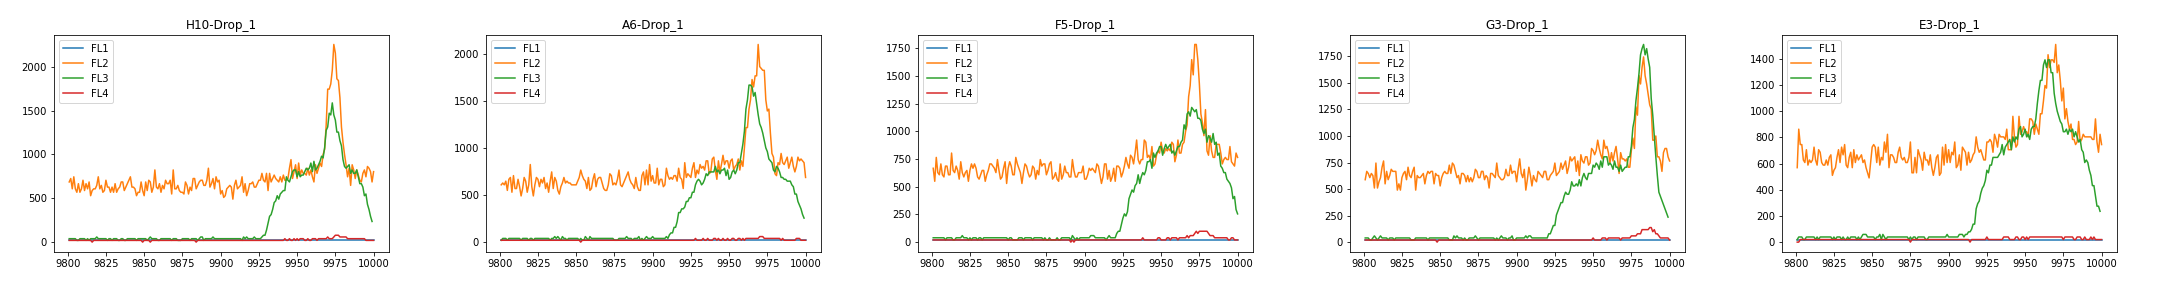

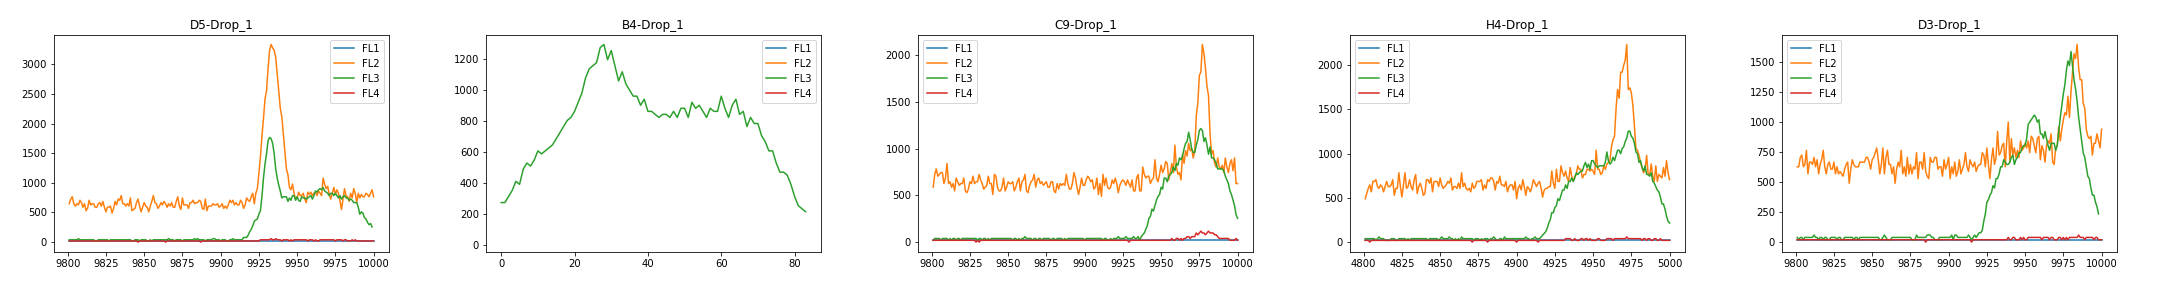

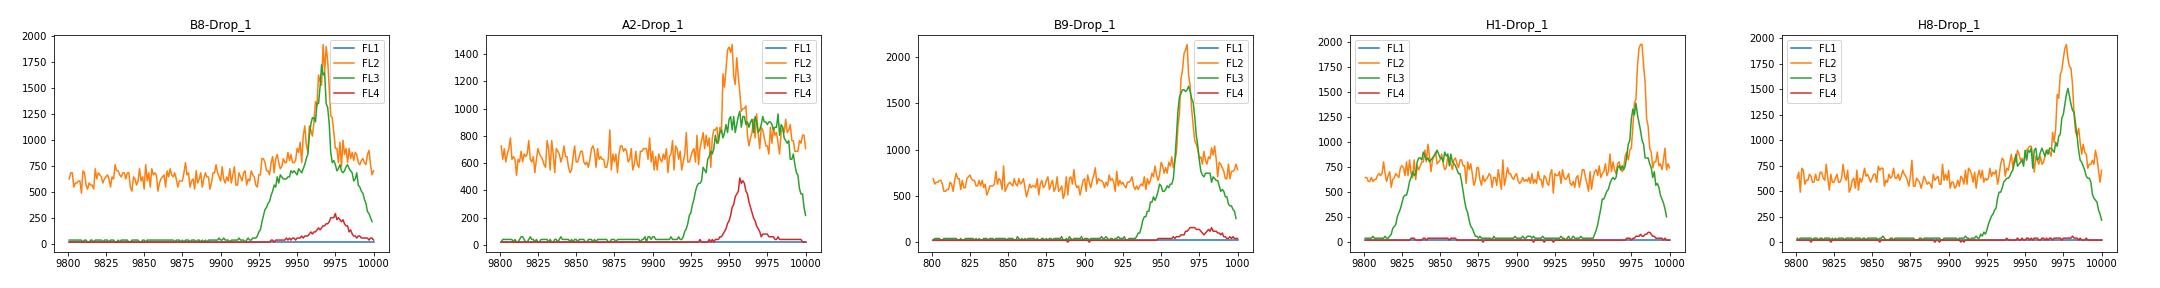

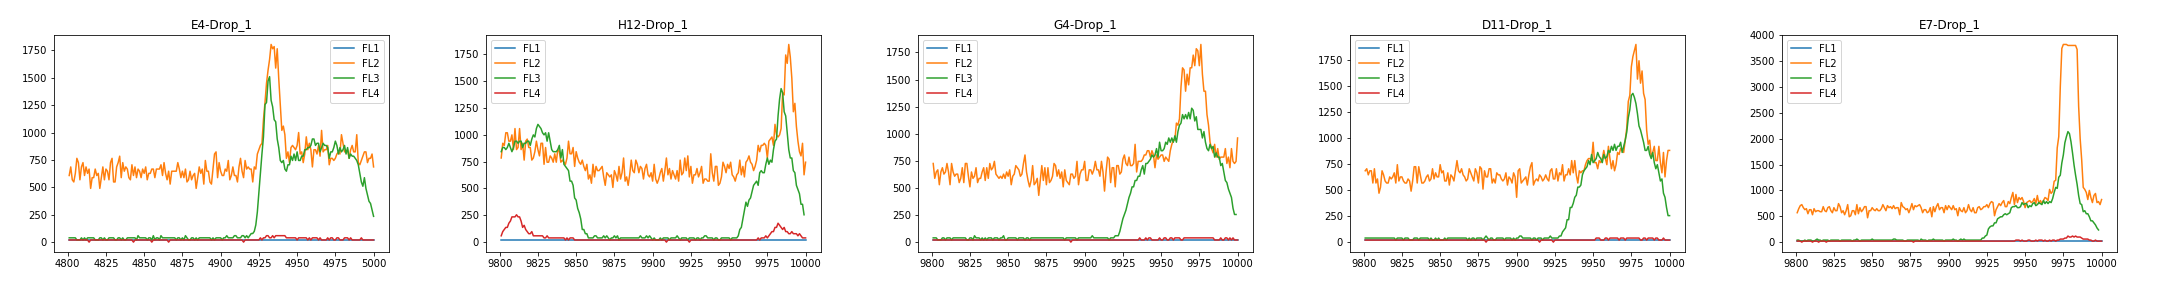

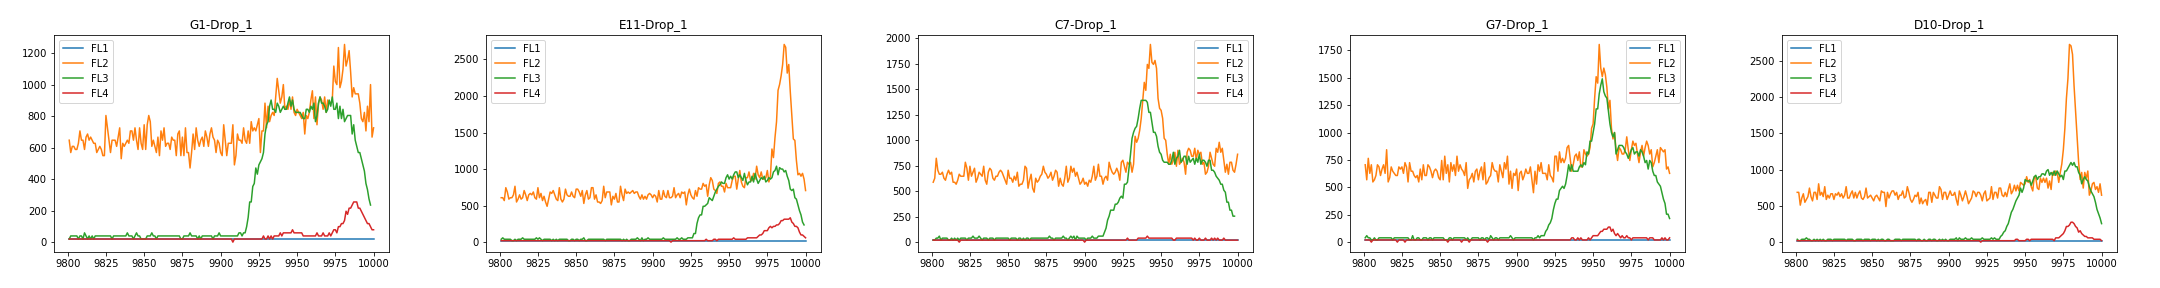

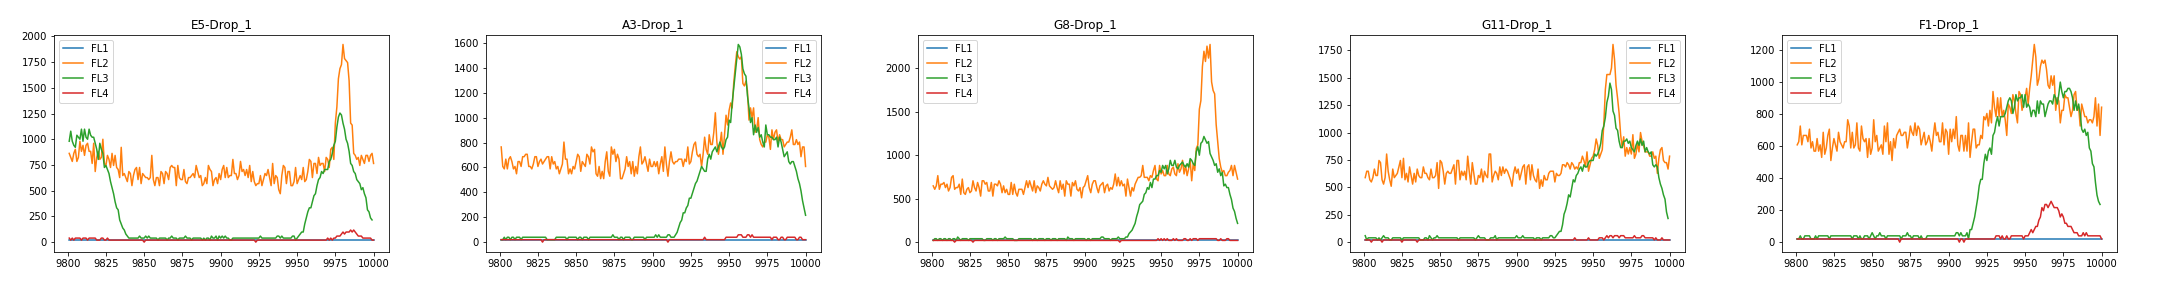

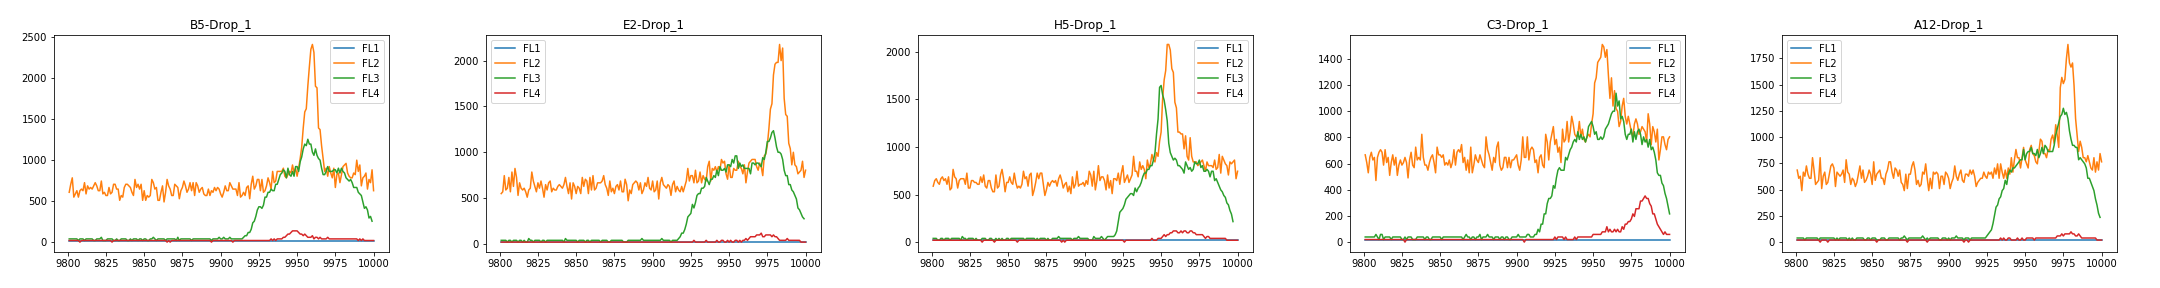

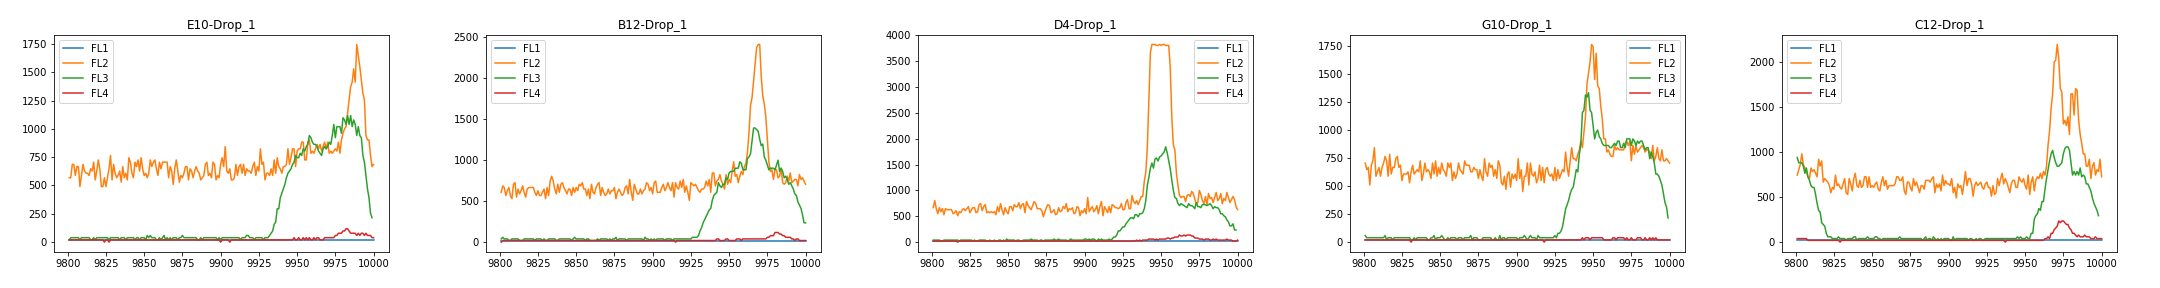

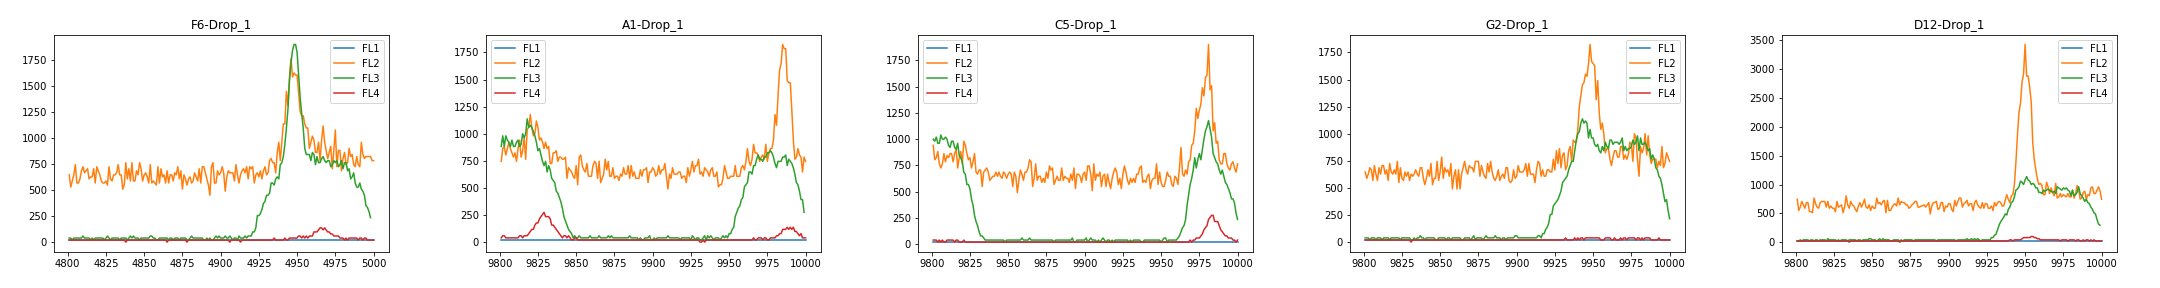

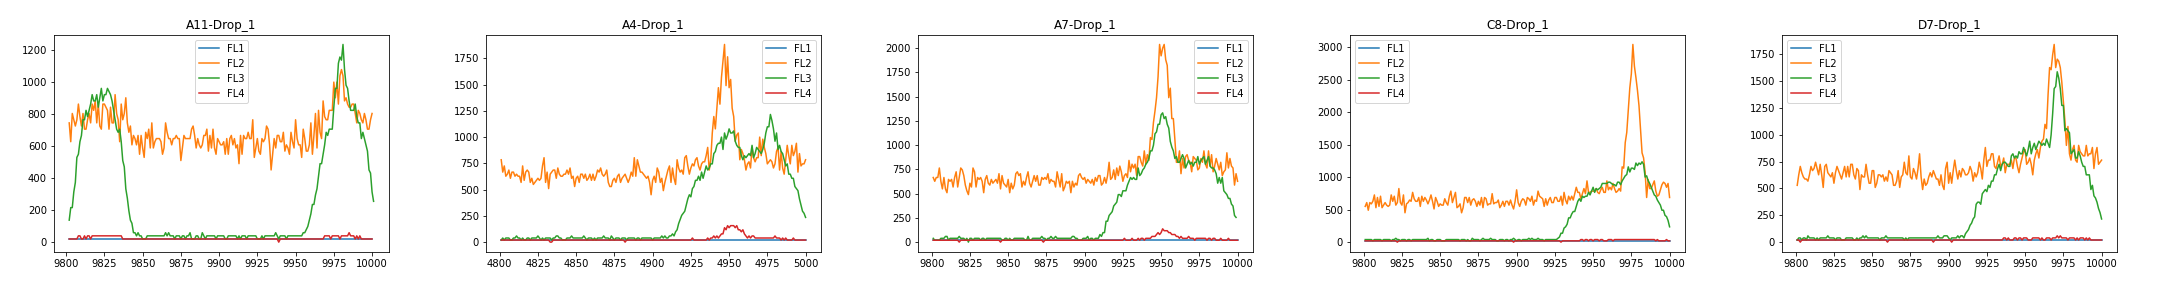

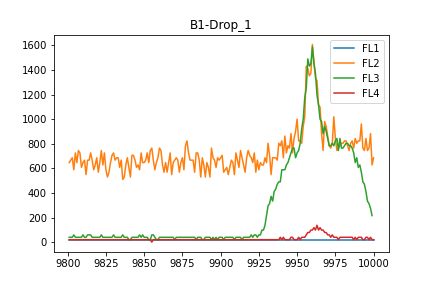

In [49]:
# prompt: Modify from previous code, the new image should made from 5 file, and only use the image file has "_200" in the file name. continue make new image untill all qualify file are used to make new image.

from google.colab import files
import os
import cv2
from google.colab.patches import cv2_imshow
import shutil
import numpy as np

# Create a temporary directory to store uploaded files
temp_dir = "/content/uploaded_files"

# Remove the temporary directory and its contents if it exists
# This ensures you start with a clean directory each time you run the cell
shutil.rmtree(temp_dir, ignore_errors=True)
os.makedirs(temp_dir, exist_ok=True)

# Upload the folder
uploaded = files.upload()

# Move uploaded files to the temporary directory
for filename in uploaded.keys():
    shutil.move(filename, temp_dir)

# Assuming images are in a folder named 'previous_folder'
previous_folder = '/content/uploaded_files'  # Replace with the actual path

# Find all image files with "_200" in their names
image_files = [f for f in os.listdir(previous_folder) if "_200" in f and (f.lower().endswith(('.png', '.jpg', '.jpeg')))]

# Check if any images were found
if not image_files:
    print("No images with '_200' in their names found in the specified folder.")
else:
    num_images_per_combined = 5  # Number of images to combine in each new image
    for i in range(0, len(image_files), num_images_per_combined):
        current_image_files = image_files[i:min(i + num_images_per_combined, len(image_files))]
        images = []
        for image_file in current_image_files:
            image_path = os.path.join(previous_folder, image_file)
            img = cv2.imread(image_path)
            if img is not None:
                images.append(img)
            else:
                print(f"Could not read image file: {image_path}")

        if not images:
            print(f"No images could be loaded successfully for iteration {i // num_images_per_combined}.")
            continue

        # Calculate the dimensions of the combined image
        total_width = sum(img.shape[1] for img in images)
        max_height = max(img.shape[0] for img in images)

        # Create a blank canvas for the combined image
        combined_image = np.zeros((max_height, total_width, 3), dtype=np.uint8)

        # Paste individual images onto the canvas
        current_x = 0
        for img in images:
            combined_image[0:img.shape[0], current_x:current_x + img.shape[1]] = img
            current_x += img.shape[1]

        # Display the combined image
        cv2_imshow(combined_image)
        # Save the combined image (optional)
        cv2.imwrite(f'combined_image_{i // num_images_per_combined}.jpg', combined_image)

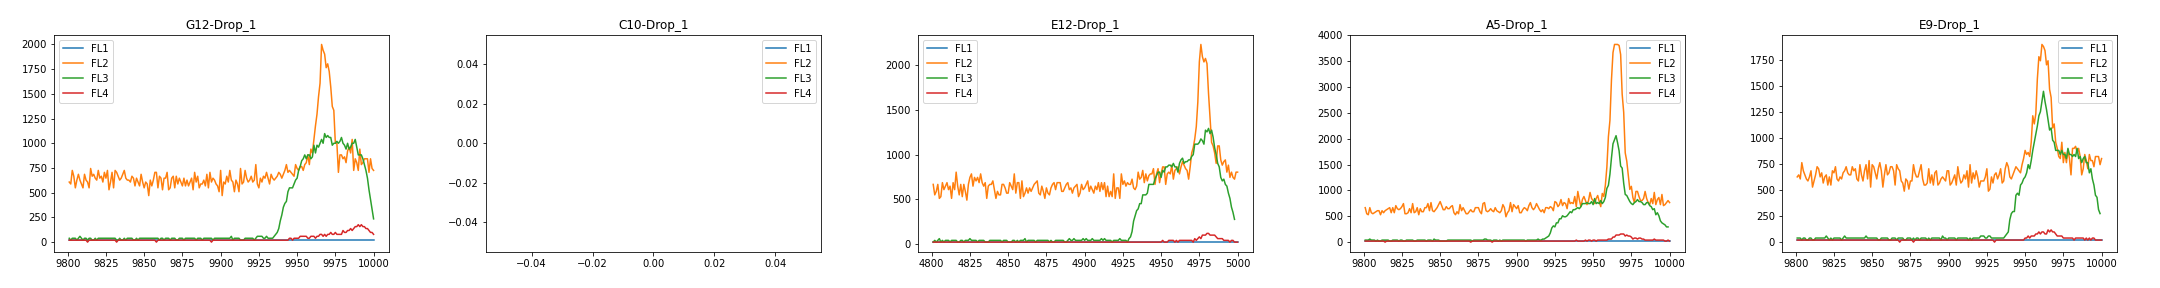

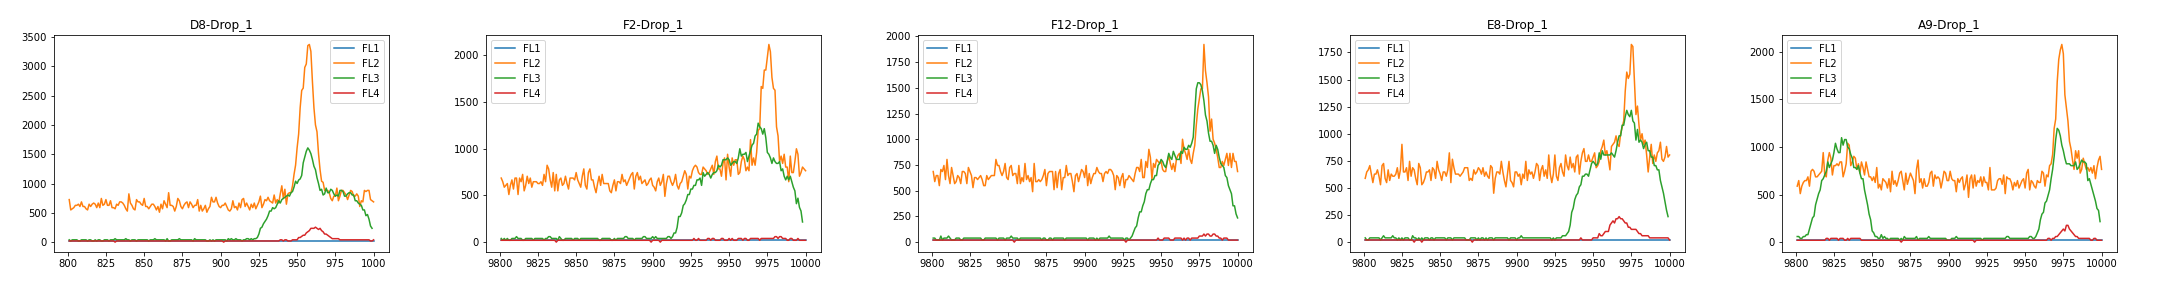

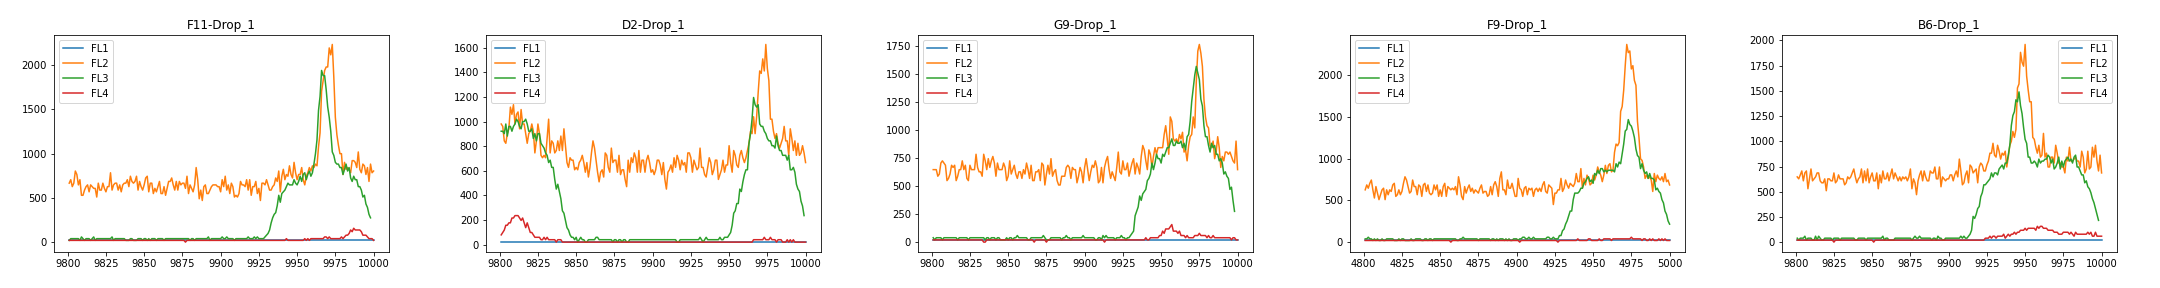

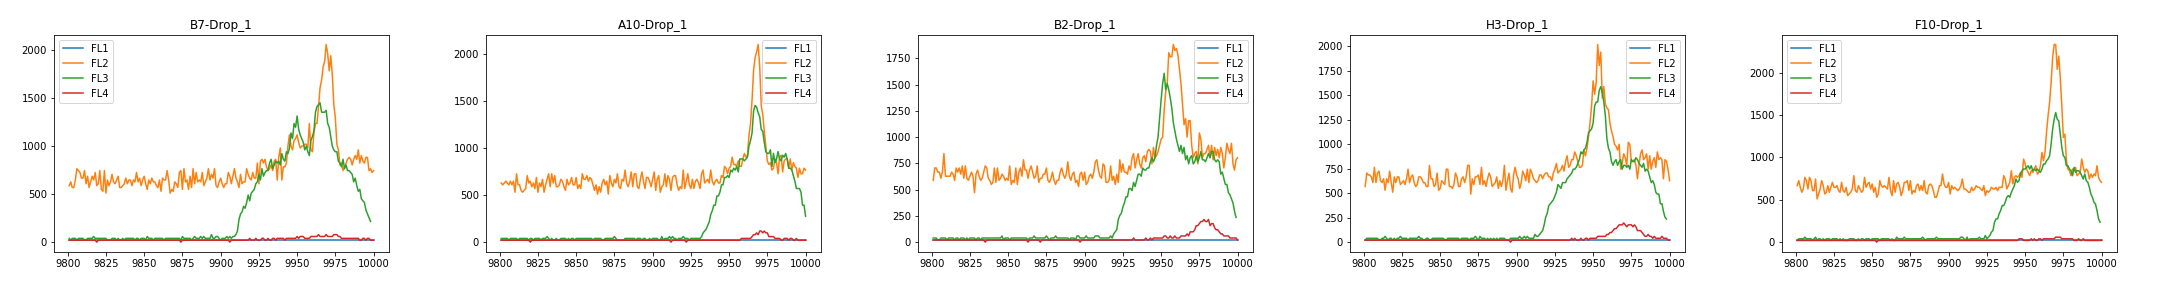

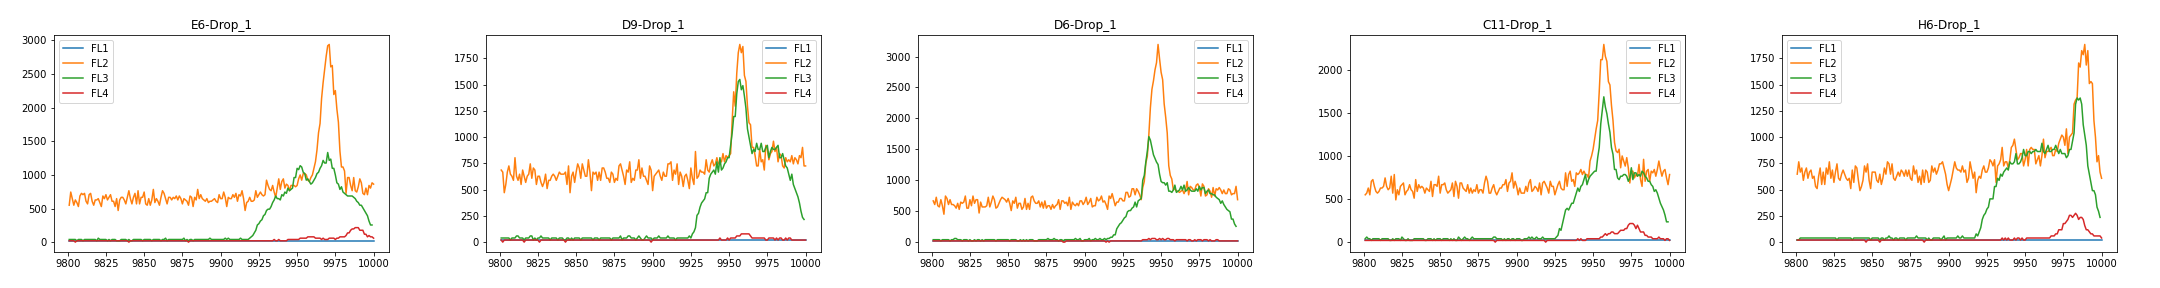

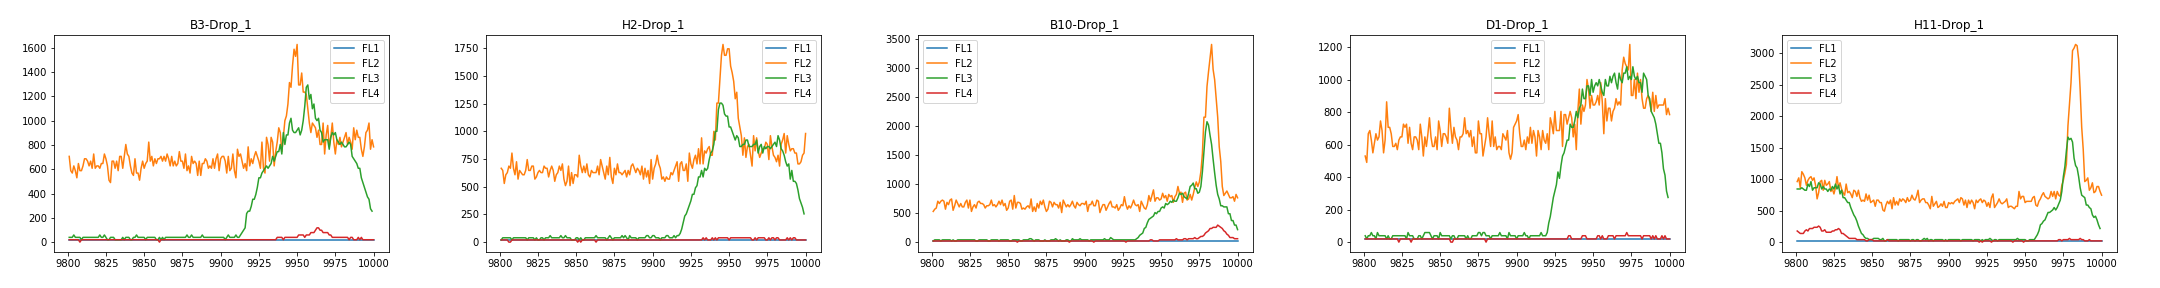

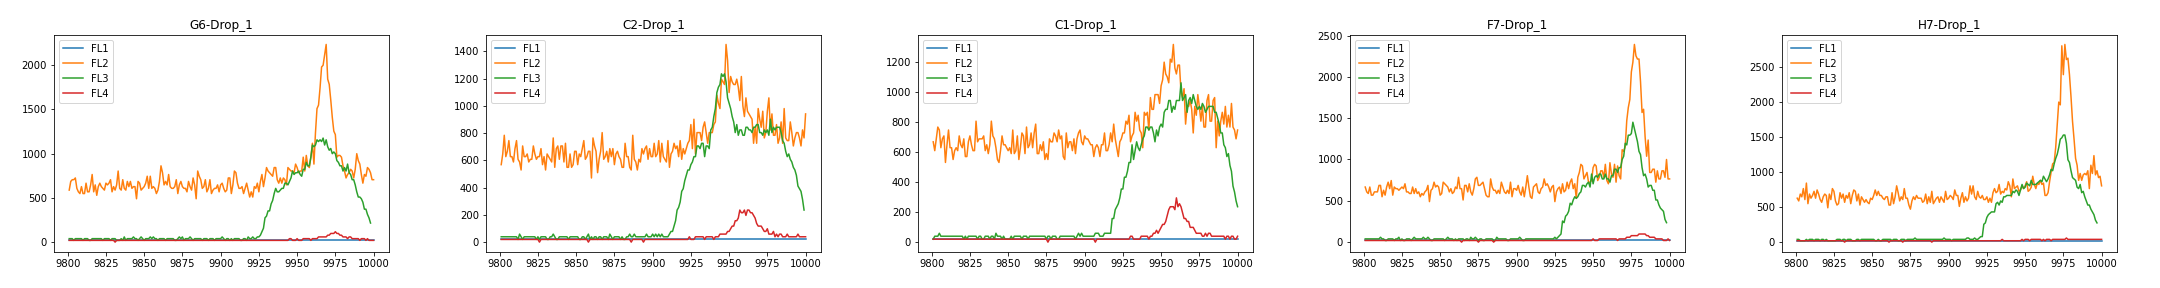

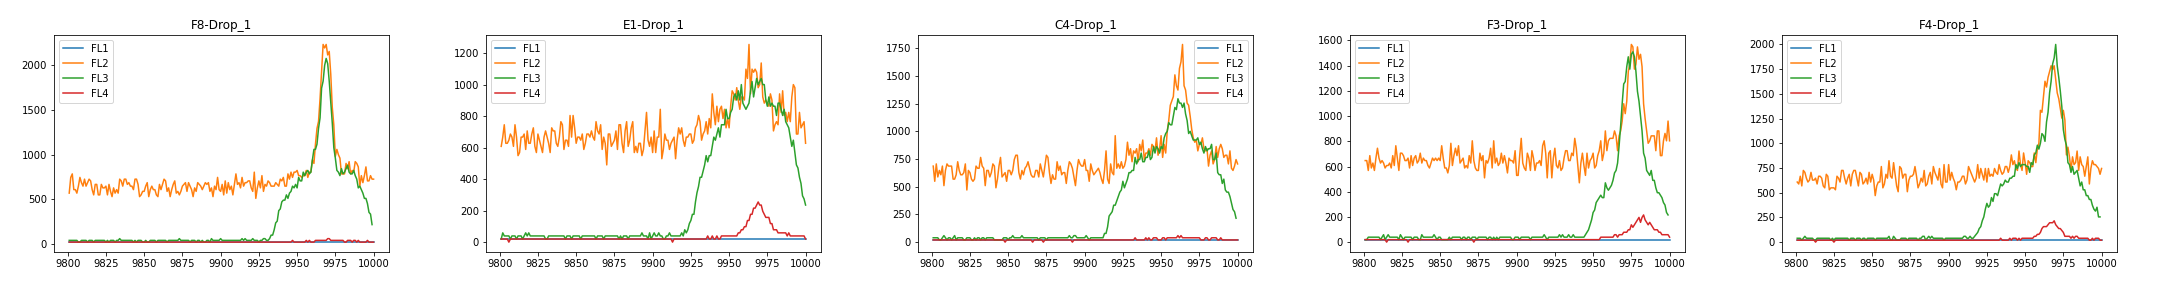

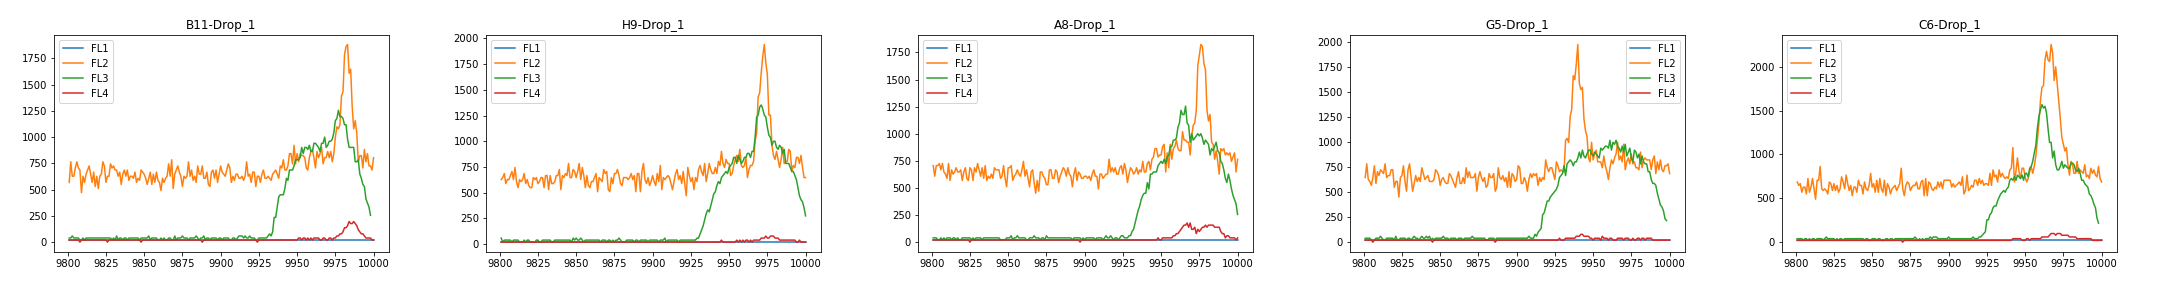

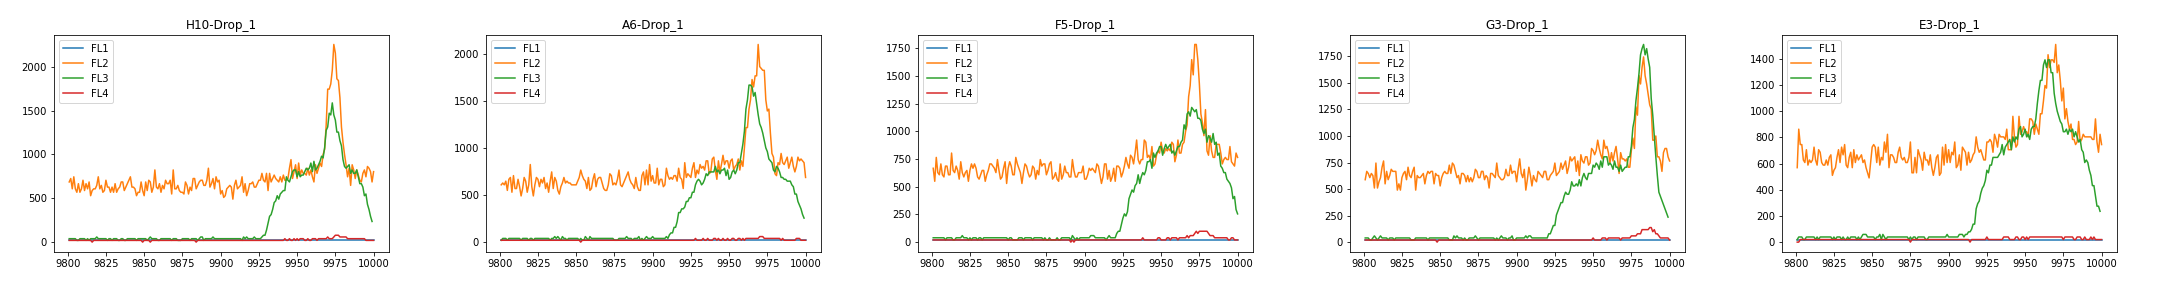

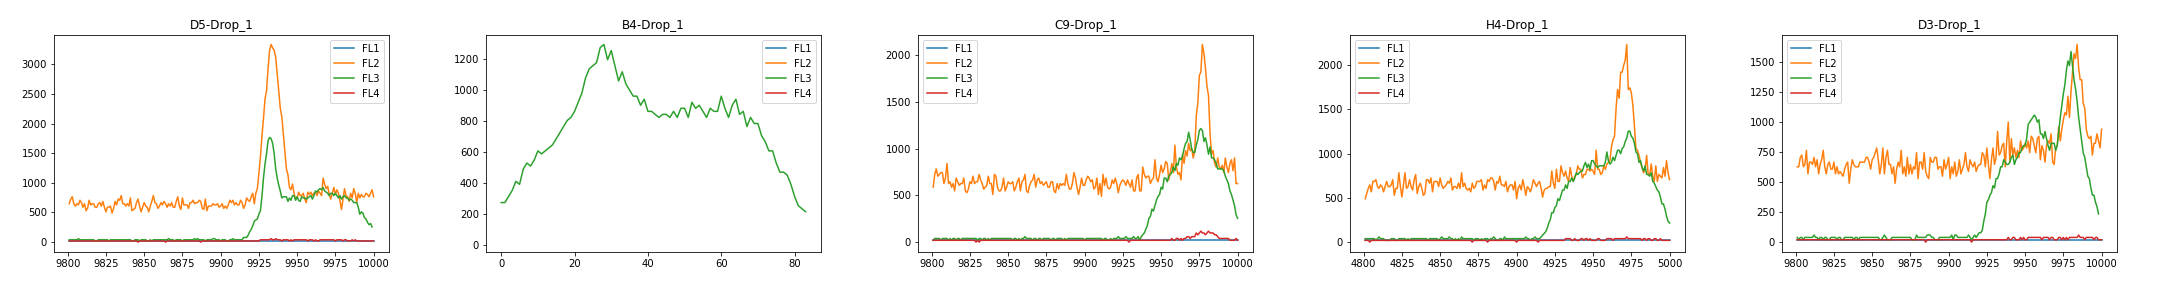

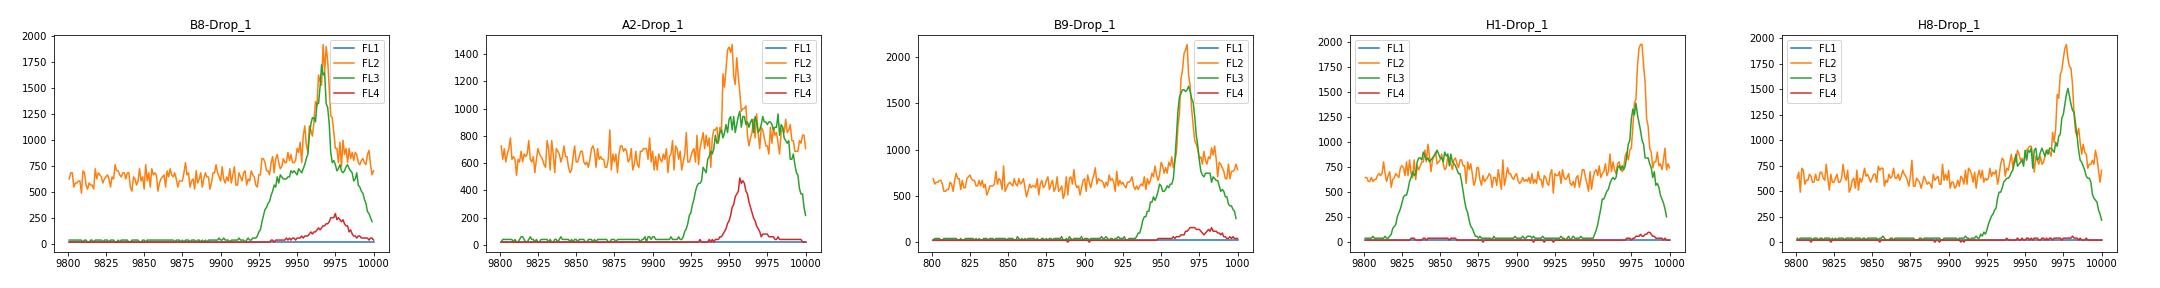

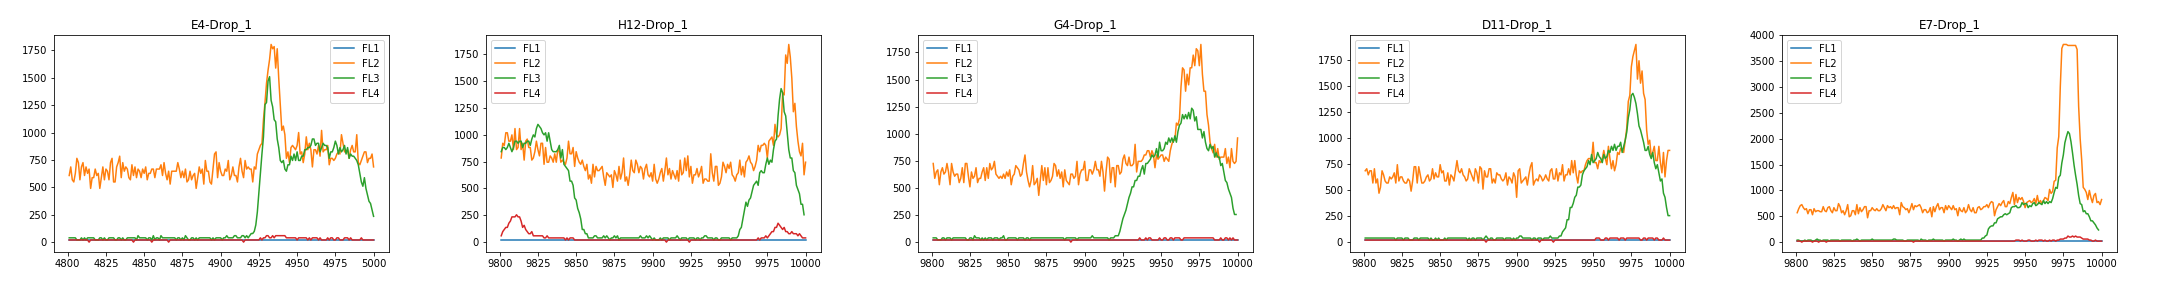

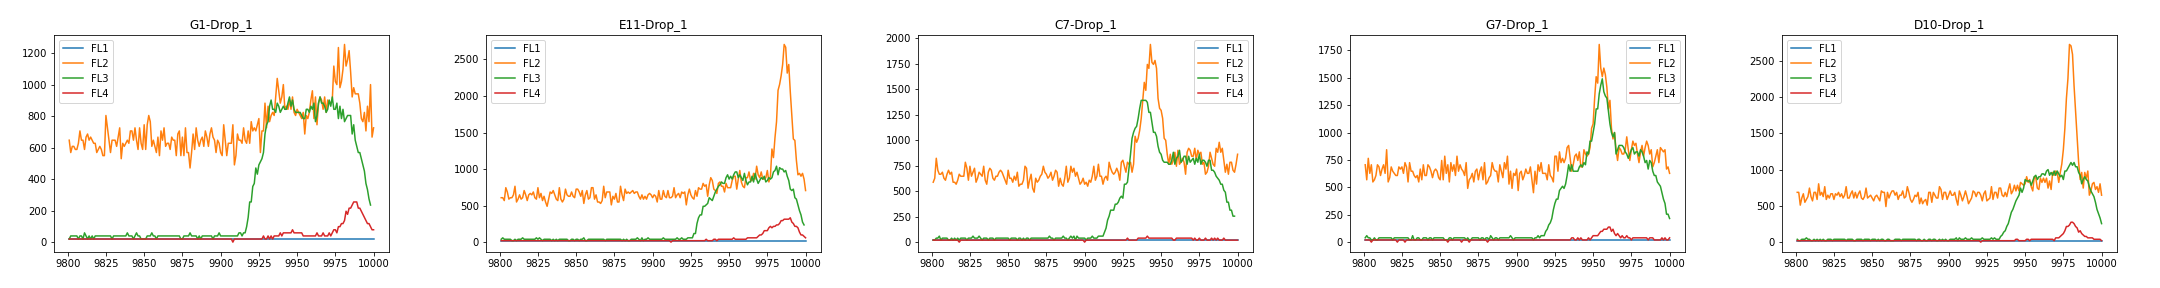

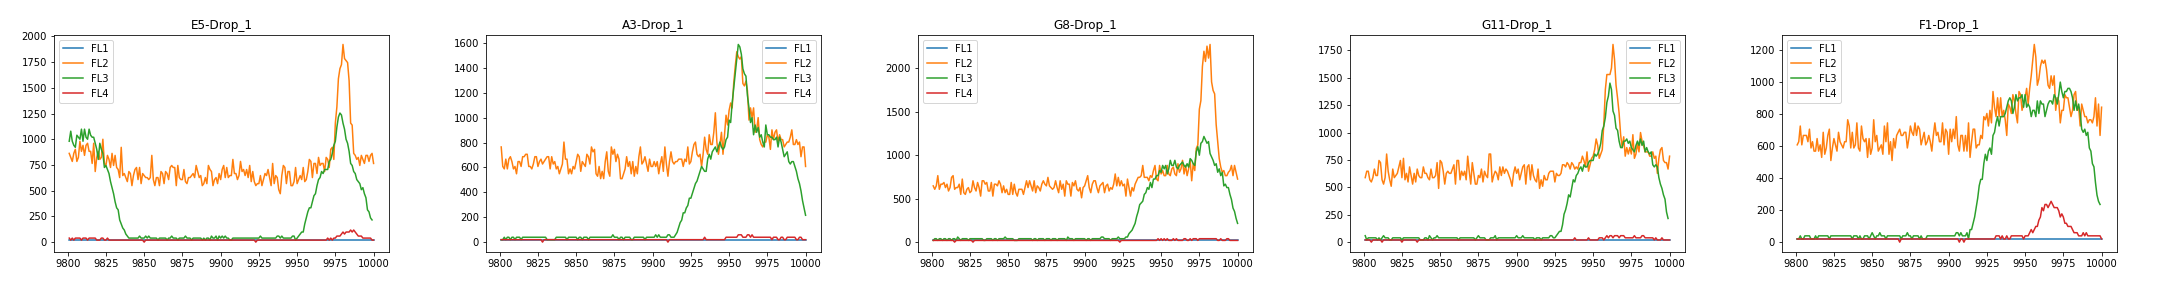

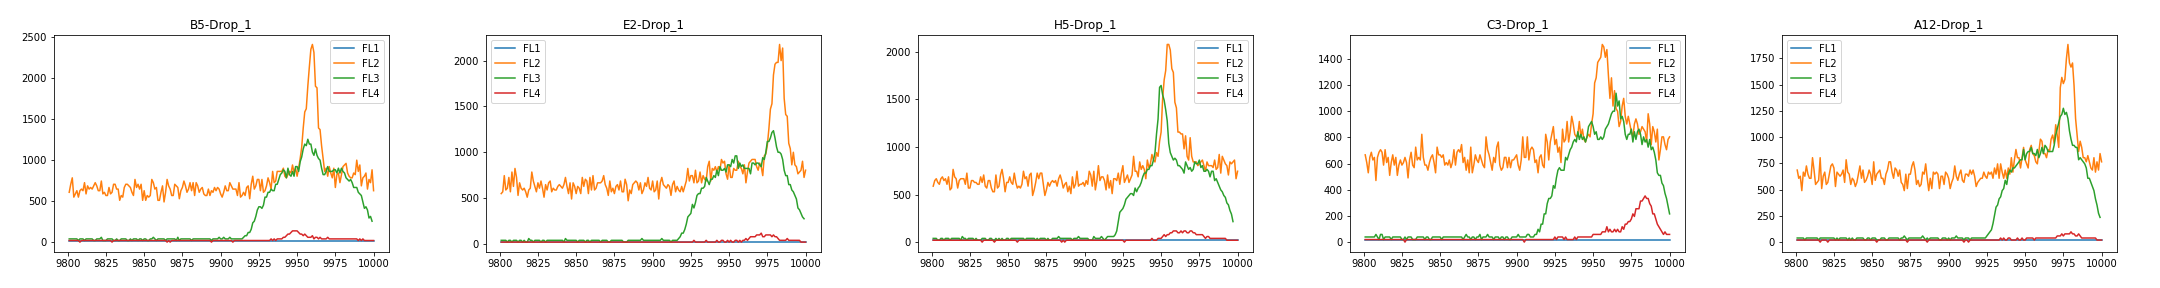

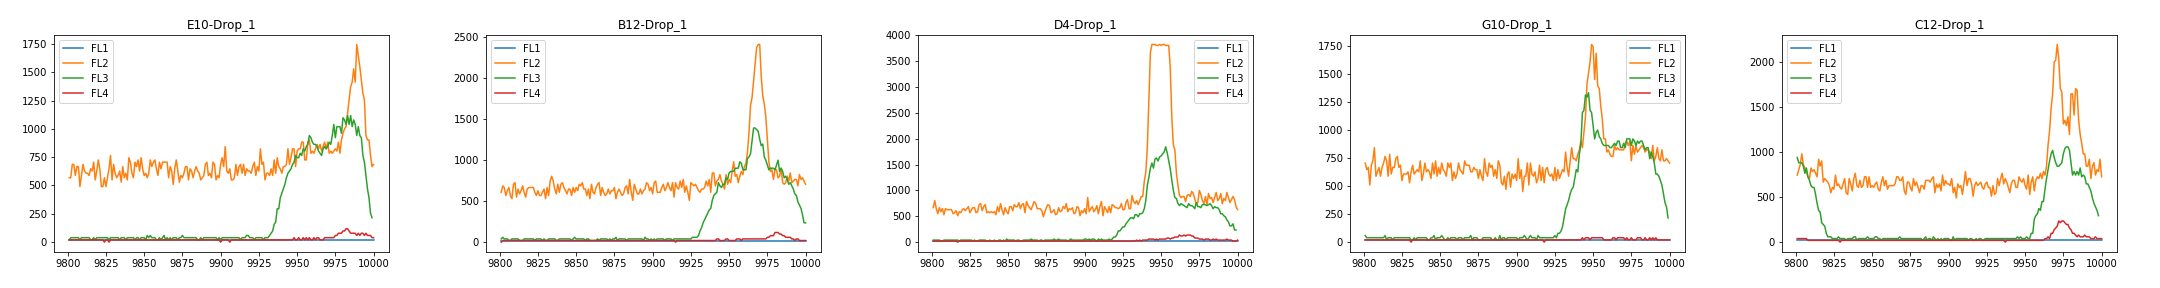

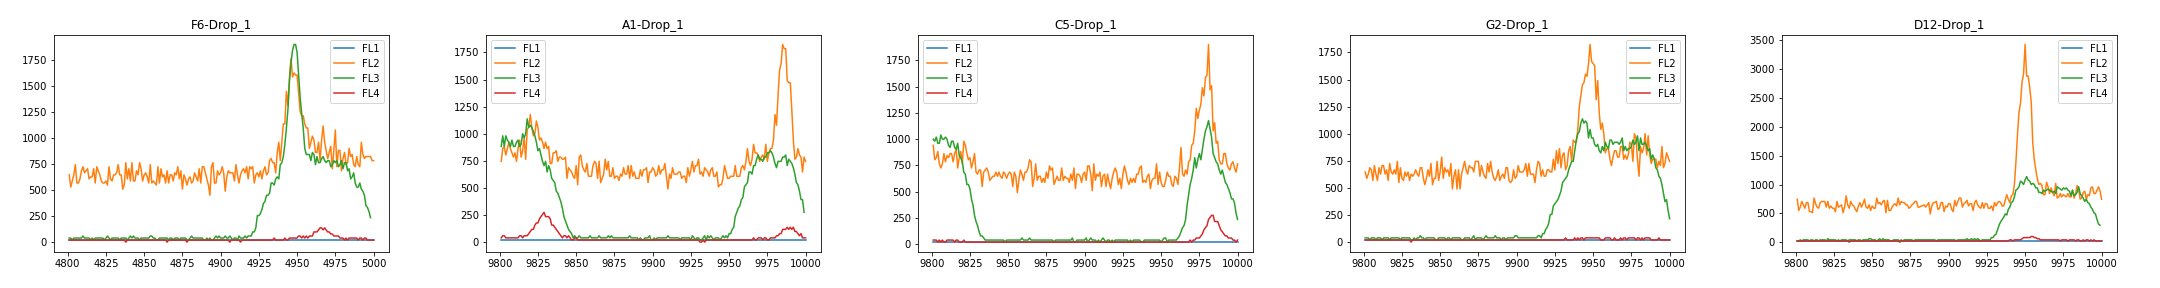

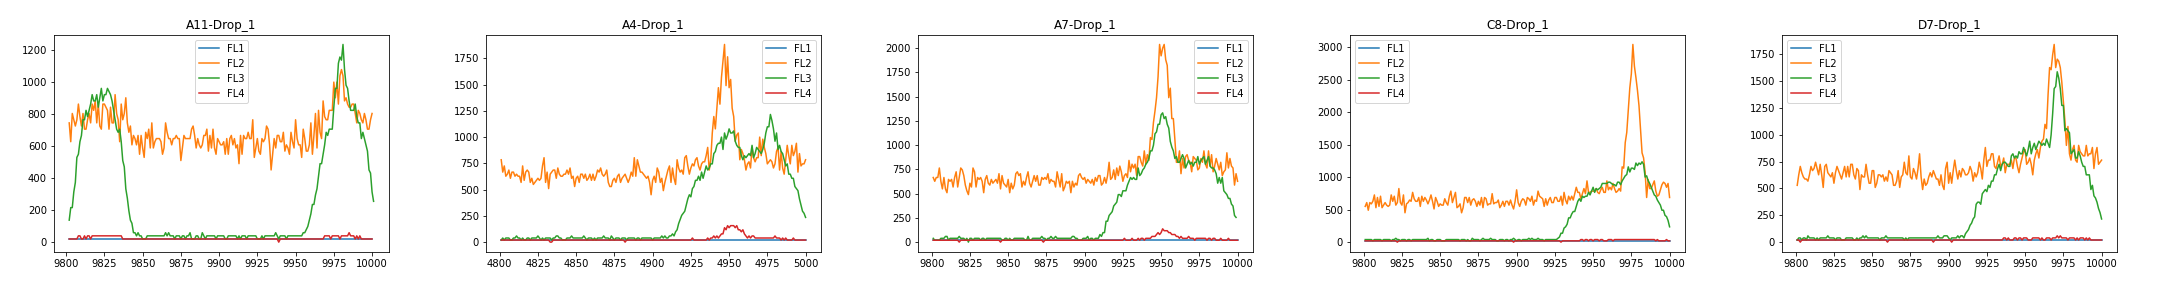

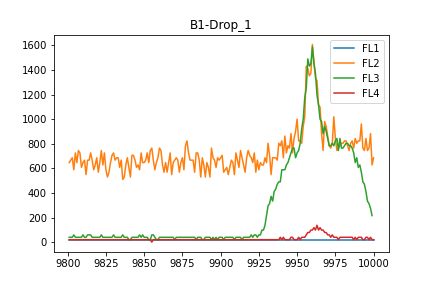

In [52]:
# prompt: Modify from previous code, the new image should made from every 5 file of uploaded images, and only use the image file has "_200" in the file name. continue make new image untill all qualify file are used to make new image. keep all the new images and removed all the uploaded images.

import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow

# Assuming images are in a folder named 'previous_folder'
previous_folder = '/content/uploaded_files'  # Replace with the actual path

# Find all image files with "_200" in their names
image_files = [f for f in os.listdir(previous_folder) if "_200" in f and (f.lower().endswith(('.png', '.jpg', '.jpeg')))]

# Check if any images were found
if not image_files:
    print("No images with '_200' in their names found in the specified folder.")
else:
    image_count = len(image_files)
    combined_image_index = 0

    for i in range(0, image_count, 5):
        current_images = []
        for j in range(i, min(i + 5, image_count)):
            image_path = os.path.join(previous_folder, image_files[j])
            img = cv2.imread(image_path)
            if img is not None:
                current_images.append(img)
            else:
                print(f"Could not read image file: {image_path}")

        if current_images:
            # Calculate dimensions of the combined image
            total_width = sum(img.shape[1] for img in current_images)
            max_height = max(img.shape[0] for img in current_images)

            # Create a blank canvas
            combined_image = np.zeros((max_height, total_width, 3), dtype=np.uint8)

            # Paste individual images
            current_x = 0
            for img in current_images:
                combined_image[0:img.shape[0], current_x:current_x + img.shape[1]] = img
                current_x += img.shape[1]

            # Save the combined image
            cv2.imwrite(f'combined_image_{combined_image_index}.jpg', combined_image)
            combined_image_index += 1

            # Display the combined image (optional - can comment out if not needed)
            cv2_imshow(combined_image)


    # Remove original images
    for image_file in image_files:
      image_path = os.path.join(previous_folder, image_file)
      os.remove(image_path)

In [61]:
# prompt: write  a code to dowlonad all the new images made by previous code

from google.colab import files
import os

# Assuming combined images are saved in the current directory
combined_images = [f for f in os.listdir('.') if f.startswith('combined_image_') and f.endswith('.jpg')]

for image in combined_images:
  files.download(image)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [51]:
# prompt: write code to remove all the new image made by the previous code

import os

# Assuming combined images are saved in the current directory
combined_image_files = [f for f in os.listdir() if f.startswith('combined') and f.endswith('.jpg')]

for image_file in combined_image_files:
    try:
        os.remove(image_file)
        print(f"Removed: {image_file}")
    except OSError as e:
        print(f"Error removing {image_file}: {e}")

Removed: combined_image_18.jpg
Removed: combined_image_5.jpg
Removed: combined_image_10.jpg
Removed: combined_image_1.jpg
Removed: combined_image_0.jpg
Removed: combined_image_9.jpg
Removed: combined_image_6.jpg
Removed: combined_image_16.jpg
Removed: combined_image_15.jpg
Removed: combined_image_13.jpg
Removed: combined_image_17.jpg
Removed: combined_image_4.jpg
Removed: combined_image_11.jpg
Removed: combined_image_7.jpg
Removed: combined_image_8.jpg
Removed: combined_image_14.jpg
Removed: combined_image_19.jpg
Removed: combined_image_3.jpg
Removed: combined_image_12.jpg
Removed: combined_image_2.jpg


In [32]:
# prompt: Write the code that Save All the new images and dowlond all the new image made by previous code.

from google.colab import files
import os
import cv2
from google.colab.patches import cv2_imshow
import shutil
import numpy as np

# ... (Your existing code) ...

# Assuming images are in a folder named 'previous_folder'
previous_folder = '/content/uploaded_files'  # Replace with the actual path

# Find all image files with "_200" in their names
image_files = [f for f in os.listdir(previous_folder) if "_200" in f and (f.lower().endswith(('.png', '.jpg', '.jpeg')))]

# Check if any images were found
if not image_files:
    print("No images with '_200' in their names found in the specified folder.")
else:
    num_images_per_combined = 5  # Number of images to combine in each new image
    for i in range(0, len(image_files), num_images_per_combined):
        # ... (Your existing code for combining images) ...

        # Save the combined image (optional)
        cv2.imwrite(f'combined_image_{i // num_images_per_combined}.jpg', combined_image) #This line was incorrectly indented. It should be aligned with the for loop.


    # Download all combined images
    for i in range(0, len(image_files), num_images_per_combined):
        filename = f'combined_image_{i // num_images_per_combined}.jpg'
        if os.path.exists(filename):
            files.download(filename)
        else:
            print(f"File {filename} not found. Skipping download.") #This block of code should be at the same indentation level as the first for loop

No images with '_200' in their names found in the specified folder.


In [47]:
# prompt: Write a code to remove all the new image made by this notebook and also remove all the uploaded file by this notebook

import os
import shutil

# Remove the temporary directory and its contents if it exists
temp_dir = "/content/uploaded_files"
shutil.rmtree(temp_dir, ignore_errors=True)

# Remove combined images
for filename in os.listdir('/content'):
    if filename.startswith("combined_image"):
        filepath = os.path.join('/content', filename)
        try:
            os.remove(filepath)
            print(f"Removed file: {filepath}")
        except OSError as e:
            print(f"Error removing file {filepath}: {e}")

In [59]:
# prompt: Write a code to download all the file which file name has "Combined_" and  files in "/content/"

import os
from google.colab import files

# Specify the directory to search for files
directory = "/content/"

# Iterate through all files in the directory
for filename in os.listdir(directory):
    # Check if the filename starts with "Combined_"
    if filename.startswith("Combined_"):
        filepath = os.path.join(directory, filename)

        # Check if it's a file (not a directory)
        if os.path.isfile(filepath):
            try:
                files.download(filepath)
                print(f"Downloaded: {filename}")
            except Exception as e:
                print(f"Error downloading {filename}: {e}")